# Objectif

Trouver pour quelles raisons les employés quittent l'entreprise.

Mettre en place une démarche Datascience rigoureuse pour répondre à la question

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style('whitegrid')

# Chargement du jeu de données

In [2]:
# Charger le fichier csv dans data/employees
employees_df = pd.read_csv("data/employees/HR_comma_sep.csv")
#voir à quoi ressemblent les données
employees_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#afficher les informations de notre table
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


On remarque qu'il n'y a pas de données manquantes, nos variables ont toutes 14999 observations.

Notre variable à expliquer est: "left" <=> "départ des employés" qui est une variable booléenne qui ne prend que des 1 et des 0 comme valeurs, avec 0 si l'employé est toujours en entreprise et 1 s'il l'a quittée.

Les variables explicatives sont au nombre de 9, pas besoin donc d'une ACP pour la réduction des dimensions.

On remarque aussi que 2 variables sont des objects qu'il faudra transformer en variables numériques

# Exploration du jeu de données

## description des données 

In [4]:
# trouver les particularités des données, visualiser, voir la qualité des données, stratégies de remplacement...

#afficher la liste des modalités de chaque variable
print("satisfaction_level", employees_df["satisfaction_level"].unique())
print("last_evaluation", employees_df["last_evaluation"].unique())
print("number_project", employees_df["number_project"].unique())
print("average_montly_hours", employees_df["average_montly_hours"].unique())
print("time_spend_company", employees_df["time_spend_company"].unique())
print("Work_accident", employees_df["Work_accident"].unique())
print("left", employees_df["left"].unique())
print("promotion_last_5years", employees_df["promotion_last_5years"].unique())
print("sales", employees_df["sales"].unique())
print("salary", employees_df["salary"].unique())

#Afficher les paramètres statistiques de chacune des variables
employees_df.describe()

satisfaction_level [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
last_evaluation [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
number_project [2 5 7 6 4 3]
average_montly_hours [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 145

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


On remarque que la colonne "sales" représente les différents départements de l'entreprise dont celui des ventes: "sales". Afin d'éviter toute confusion, on renommera cette variable. Je le renomme "departements"

In [5]:
#Nettoyage des données

#Renommer la variable "sales" en "departements"
employees_df.rename(columns={'sales':'departements'}, inplace=True)
employees_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departements,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


On note que la variable a bien changé de nom.

In [6]:
print("departements", employees_df["departements"].unique())

departements ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


# Exploration des données : GRAPHS

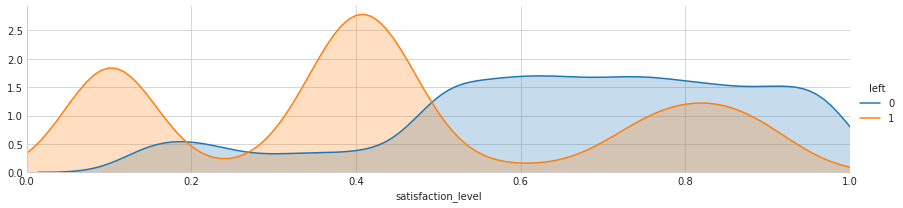

In [7]:
#satisfaction_level
facet = sns.FacetGrid(employees_df, hue="left",aspect=4)
facet.map(sns.kdeplot,'satisfaction_level',shade= True)
facet.set(xlim=(0, employees_df['satisfaction_level'].max()))
facet.add_legend()

Le graphe de satisfaction_level nous montre que ceux qui ont voté entre 0.5 et 1 ne sont pas forcément tous restés. Il y a une tendance même au niveau de 0.8 qui montre que cet indicateur n'est pas significatif.
Cependant, on observe une large corrélation entre les votes pour la valeur 0.4 et le nombre d'employés qui ont quitté.
Etant donné ces irrégularités, je pense qu'il serait préférable de ne pas prendre en considération cette variable qui, à mon sens, est biaisée. Cela pourrait s'expliquer par le fait que bien que les employés soient satisfaits de leur entreprise, ils ont dû la quitter pour des raisons autres que ce que l'entreprise peut leur offrir (raisons personnelles)

        -Cette variable n'est pas significative 

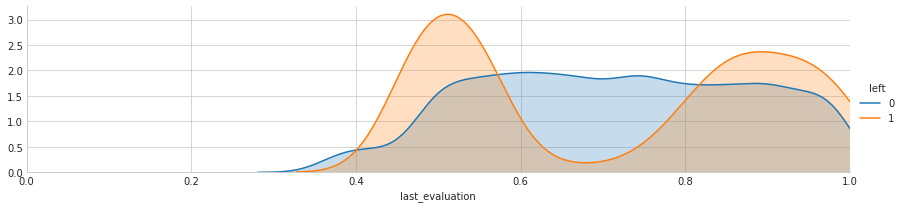

In [8]:
#last_evaluation
facet = sns.FacetGrid(employees_df, hue="left",aspect=4)
facet.map(sns.kdeplot,'last_evaluation',shade= True)
facet.set(xlim=(0, employees_df['last_evaluation'].max()))
facet.add_legend()

On remarque que les notes des évaluations se situent presque toutes entre: 0.3 et 0.9. 
Les notes des employés ayant quitté se situent entre 0.5 et 0.9, donc dans la partie haute (au dessus de la moyenne)  et cela ne les a pas empêché de quitter l'entreprise.

    - Cette variable ne semble pas représentative.
    - On pourrait donc la retirer.

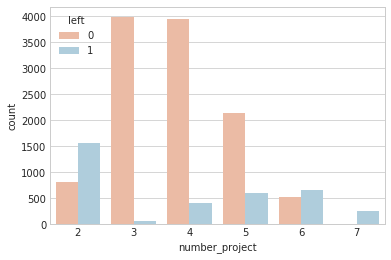

In [9]:
#number_project

sns.countplot(x='number_project', hue='left', data=employees_df, palette='RdBu')

Le graphe nous montre que les employés qui sont restés en majorité à l'entreprise (au nombre total des deux classes de près de 8000 employés) sont ceux qui avaient entre 3 et 4  projets à gérer.  
Concernant les employés qui ont quitté, la majeure partie d'entre eux est constituée de ceux qui n'avaient que 2 projets à gérer à hauteur de 1600 employés, ce qui reste un nombre assez faible.

    -Cette variable est significative et mérite d'être conservée.

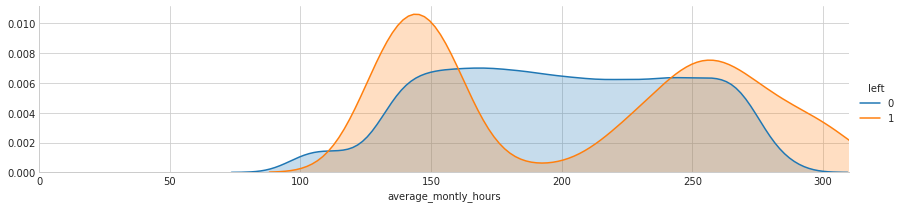

In [10]:
#average_montly_hours
facet = sns.FacetGrid(employees_df, hue="left",aspect=4)
facet.map(sns.kdeplot,'average_montly_hours',shade= True)

facet.add_legend()

On observe que les employés ayant quitté sont ceux dont le nombre d'heures de travail mensuelles se situent entre 140 et 230. 
Cependant, une grande majorité de ceux qui travaillent encore dans l'entreprise font un total de 140H/mois
On observe un pic d'employés qui sont restés et qui travaillent plus de 250H/mois, il pourrait s'agir des cadres sup qui ne sont pas payés au nombre d'heures ainsi que les dirigeants.

        - Cette variable n'est pas significative

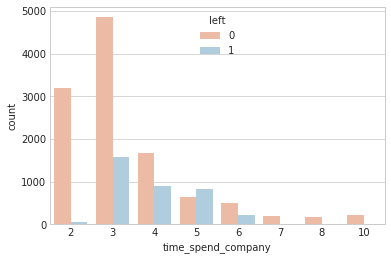

In [11]:
#time_spend_company

sns.countplot(x='time_spend_company', hue='left', data=employees_df, palette='RdBu')

On observe une tendance aux départs parmi les employés qui ont passé entre 3 et 6 ans dans l'entreprise.
On remarque aussi que la majeur partie des empployés qui ont rejoint l'entreprise depuis moins de 4 ans y restent.
Alors qu'entre 7 et 10, une baisse des employés qui quittent ainsi que ceux qui restent est observée.


    - Cette variable est significative et mérite d'être conservée.

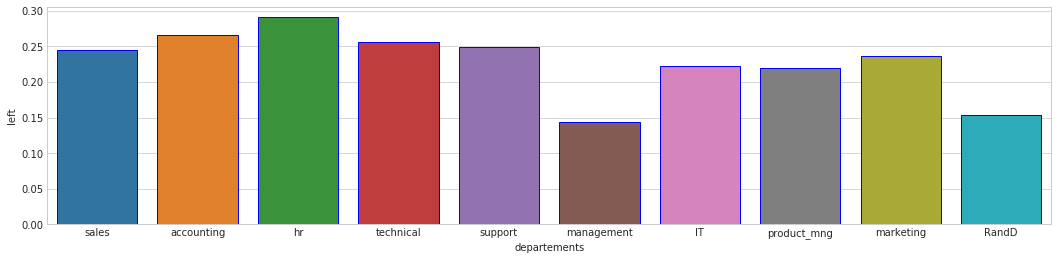

In [12]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_left = employees_df[["departements", "left"]].groupby(['departements'],as_index=False).mean()
sns.barplot(x='departements', 
            y='left', 
            data= average_left, 
            order=['sales', 'accounting', 'hr', 'technical', 'support', 'management', 
                   'IT', 'product_mng', 'marketing', 'RandD'],
            edgecolor='blue')



on remarque que les départs sont en moyenne presque tous égaux pour les départements autres que le management et le RandD

    - Cette variable est significative

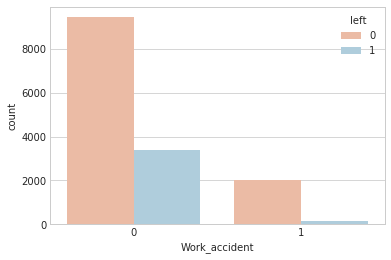

In [13]:
#Work_accident

sns.countplot(x='Work_accident', hue='left', data=employees_df, palette='RdBu')

On remarque une nette corrélation entre les accidents au travail et le départ des employés.
        - Cette varable est significative. 

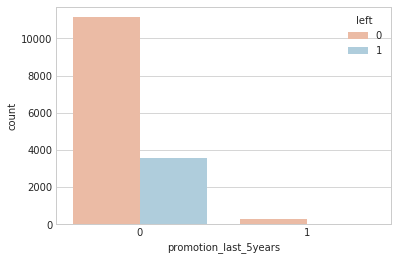

In [14]:
#promotion_last_5years
sns.countplot(x='promotion_last_5years', hue='left', data=employees_df, palette='RdBu')

Tout comme pour la variable précédente, on remarque d'après le graphe que le nombre d'employés ayant quitté l'entreprise sont ceux qui n'ont eu aucune promotion les 5 dernières années.
    
    - Cette variable est sigificative.

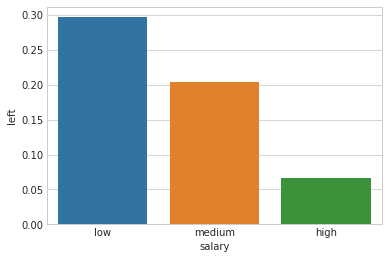

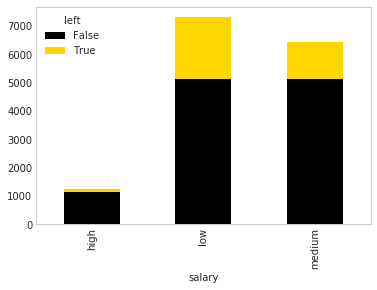

In [15]:
#salary
salary_perc = employees_df[["salary", "left"]].groupby(["salary"],as_index=False).mean()
sns.barplot(x='salary', y='left', data=salary_perc, order=['low', 'medium', 'high'])

salary_counts = pd.crosstab([employees_df.salary], employees_df.left.astype(bool))
salary_counts.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)

Les deux graphes de "salary" montrent que, parmi les employés qui avaient un salaire élevé ("high"), seuls 5% ont quitté. 
Alors que 28% de ceux qui avaient un salaires bas ("low") ont quitté. 

    - Cette variable peut être un bon indicateur. 

# Analyse des graphiques

L'analyse directe des graphiques montre que certaines variables peuvent être retirées car elle ne semble pas être corrélées au départ des employés.
Ces variables sont:
- average_montly_hours
- satisfaction_level
- last_evaluation

Je retire donc ces variables de mon jeu de données afin de créer un nouveau jeu auquel j'appliquerai mon modèle d'apprentissage.

In [16]:
#construction des indicateurs qui seront donnés au modèle pour l'apprentissage
#Retrait des variables non significatives: - average_montly_hours - satisfaction_level - last_evaluation
employees_df.drop(['average_montly_hours'],axis=1,inplace=True)
employees_df.drop(['satisfaction_level'],axis=1,inplace=True)
employees_df.drop(['last_evaluation'],axis=1,inplace=True)
employees_df.head()

,number_project,time_spend_company,Work_accident,left,promotion_last_5years,departements,salary
0,2,3,0,1,0,sales,low
1,5,6,0,1,0,sales,medium
2,7,4,0,1,0,sales,medium
3,5,5,0,1,0,sales,low
4,2,3,0,1,0,sales,low


# Construction des indicateurs

In [17]:
#transformation des données

#1- transformation de la variable "departements" qui est en string en plusieurs variables booléennes

departements_dummies_employees = pd.get_dummies(employees_df['departements'])
employees_df = employees_df.join(departements_dummies_employees)
employees_df.drop(["departements"], axis=1, inplace=True)
employees_df.head()


,number_project,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,2,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0
1,5,6,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
2,7,4,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
3,5,5,0,1,0,low,0,0,0,0,0,0,0,1,0,0
4,2,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0


In [18]:
#2- transformation de la variable "salary" qui est en string en plusieurs variables booléennes

departements_dummies_employees = pd.get_dummies(employees_df['salary'])
employees_df = employees_df.join(departements_dummies_employees)
employees_df.drop(["salary"], axis=1, inplace=True)
employees_df.head()

,number_project,time_spend_company,Work_accident,left,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,5,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,7,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,5,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


# Construction du modèle

## GaussianNB 


In [19]:
# Partie de construction et d'apprentissage du modèle
# choix des paramètres
# éviter le surapprentissage, favoriser la généralisation du modèle

#créer un jeu d'apprentissage et de validation
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train = employees_df.drop("left",axis=1)
y_train = employees_df["left"]

#définir les paramètres de l'apprentissage:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

# Gaussian Naive Bayes
gs = GaussianNB()
gs.fit(X_train, y_train)
Y_pred = gs.predict(X_test)
gs.score(X_train, y_train)

#afficher le score du modèle sur le jeu de test
print(gs.score(X_test, y_test))

#fonction de prédiction :
preds= gs.predict(X_test)

0.5468888888888889


/home/mmichaut/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Le score du modèle Gaussien montre que ce modèle ne représente notre jeu de données qu'à hauteur de 54,69%

## validation ou rejet du modèle Gaussien

0.8582089552238806
0.3277520484503028
             precision    recall  f1-score   support

          0       0.45      0.91      0.60      1693
          1       0.86      0.33      0.47      2807

avg / total       0.70      0.55      0.52      4500

Confusion matrix, without normalization
[[ 920 1887]
 [ 152 1541]]


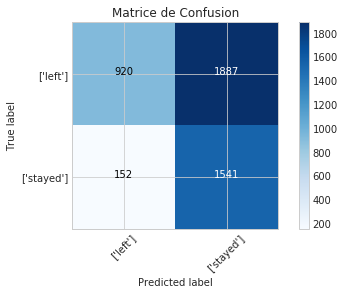

In [20]:
# evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics
import itertools
from sklearn.cross_validation import cross_val_score


print(precision_score(preds, y_test))
print(recall_score(preds, y_test))
print (metrics.classification_report(preds,y_test))


cm = confusion_matrix(preds, y_test, labels=[1,0])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm, [["left"], ["stayed"]],
                          title='Matrice de Confusion',
                          cmap=plt.cm.Blues)


la matrice de confusion du modèle K-NN nous montre que 
- nous avons estimé que 1297 employés resteraient et ils sont bien restés : FN
- nous avons estimé que 675 employés quitteraient et ils ont bien quitté : VP

et d'un autre coté, elle nous montre que:
- nous avions estimé que 396 personnes quitteraient mais elles sont restées : VN
- nous avions estimé que 2132 personnes resteraient mais elles ont quitté : FP

VN > FN et FP > VP 

le modèle ne donne pas de bons résultats.

J'utiliserai une autre méthode afin de vérifier si l'on peut obtenir un modèle qui permettrait de mieux expliquer les données 

## K-NN : K-NearestNeighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#Créer des tableaux X pour les caractéristiques et y pour la variable cible : 
X = employees_df.drop('left', axis=1).values
Y = employees_df['left'].values 

#Créer un classififieur KNeighborsClassifier appelé knn avec 6 voisins : 
knn = KNeighborsClassifier(n_neighbors = 3)

#Ajuster le classificateur aux données: knn.fit(X,y)
knn.fit(X, Y)

#PREDIRE DES ETIQUETTES SUR DE NOUVELLES DONNEES : .PREDICT()
Y_pred = knn.predict(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42, stratify=Y)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

print(knn.score(X_test, Y_test))

0.9086666666666666


Le score du modèle Gaussien montre que ce modèle ne représente notre jeu de données qu'à hauteur de 90,87%

## Validation ou rejet du modèle K-NN

0.7962542565266743
0.7857742929151498
             precision    recall  f1-score   support

          0       0.93      0.94      0.94     11428
          1       0.80      0.79      0.79      3571

avg / total       0.90      0.90      0.90     14999

Confusion matrix, without normalization
[[ 2806   765]
 [  718 10710]]


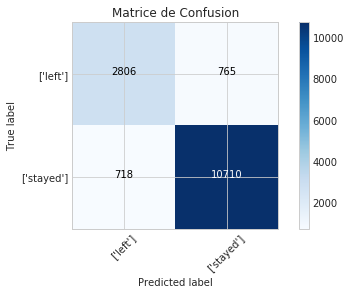

In [22]:
print(precision_score(Y, Y_pred))
print(recall_score(Y, Y_pred))
print (metrics.classification_report(Y, Y_pred))


cm = confusion_matrix(Y, Y_pred, labels=[1,0])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cm, [["left"], ["stayed"]],
                          title='Matrice de Confusion',
                          cmap=plt.cm.Blues)

la matrice de confusion du modèle K-NN nous montre que 
- nous avons estimé que 10710 employés resteraient et ils sont bien restés : FN
- nous avons estimé que 2806 employés quitteraient et ils ont bien quitté : VP

et d'un autre coté, elle nous montre que:
- nous avions estimé que 718 personnes quitteraient mais elles sont restées : VN
- nous avions estimé que 765 personnes resteraient mais elles ont quitté : FP

VN < FN et FP < VP 
le modèle donne donc de bons résultats.

On conservera ce modèle pour la prise de décision

# Interprétation des résultats

## Interprétation des résultats, comparaison des différents modèles

Au vu des précédents tests, nous préférerons le modèle K-NN qui a un score plus élevé que celui du modèle Gaussien (91% contre 54%)

## Variables explicatives 

Les variables explicatives sont celles que l'on a conservées, à savoir:
- number_project
- time_spend_company
- Work_accident
- promotion_last_5years
- salary


# Perspectives

## Quelles nouvelles analyses pourraient être faites?, quels modèles, indicateurs, pistes d'améliorations...?

Il serait possible de faire une multitude d'analyses en croisant certaines variables afin de voir quelles corrélations existent entre elles.
Par exemple: 
- est-ce que le nombre d'heures passées en entreprise / mois est corrélées au salaire?
- quels sont les départements où les employés passent le plus de temps en entreprise? 
- quels sont les édépartements où il y a eu le plus de promotions sur les 5 dernières années?
...

Il faudrait dans un premier temps effectuer une étude graphique et voir quelles sont les variables qui sont corrélées 2 à 2 

Par la suite, on pourrait effectuer une Analyse en Composantes Principales afin de vérifier cette analyse graphique.

D'autre part, on pourrait aussi effectuer cette ACP afin de voir si les variables qu'on a supprimées méritaient vraiment ce traitement :) ou si l'on devrait les garder. 

